## Grouping data

Pandas makes it possible to group observations by values of a certain column. For example, if we have data on different US states we can group the observations by the geographical regions or time zones to which the states belong. In MS Excel the same functionality can be achieved with Pivot Tables.

In [44]:
import pandas as pd
import numpy as np
%matplotlib inline

In [45]:
population  = {'California': 38332521,
                   'Oregon': 4142776,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135,
                   'Ohio': 11658609}

region = {'California': 'West',
                   'Texas': 'South',
                   'New York': 'East',
                   'Florida': 'South',
                   'Illinois': 'Mid West',
                   'Ohio': 'Mid West',
                   'Oregon': 'West'}

timezones = {'California': 'Pacific',
                   'Texas': 'Central',
                   'New York': 'Eastern',
                   'Florida': 'Eastern',
                   'Illinois': 'Central',
                   'Ohio': 'Eastern',
                   'Oregon': 'Pacific'}

df = pd.DataFrame({'pop': population, 'region': region, 'timezone': timezones})
df

,pop,region,timezone
California,38332521,West,Pacific
Oregon,4142776,West,Pacific
Texas,26448193,South,Central
New York,19651127,East,Eastern
Florida,19552860,South,Eastern
Illinois,12882135,Mid West,Central
Ohio,11658609,Mid West,Eastern


We can call the `groupby` method, providing the name of the column as the argument. The method returns a `DataFrameGroupBy` object. If we are interested in sums of values in created groups, we need to call the `sum` method on this object. The `sum` method returns a new data frame:

In [35]:
df.groupby('region').sum()

,pop
region,
East,19651127
Mid West,24540744
South,46001053
West,42475297


Here the rows are the regions and the only column contains sums of populations of individual states making up a region.

Similarly, one can obtain the mean population within each group calling the `mean` method:

In [36]:
df.groupby('region').mean()

,pop
region,
East,19651127.0
Mid West,12270372.0
South,23000526.5
West,21237648.5


Because the `sum` and `mean` methods return a data frame we can easily plot the grouped data:

<AxesSubplot:xlabel='region'>

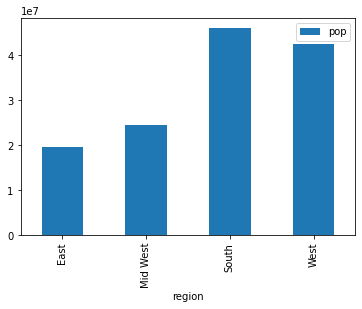

In [37]:
df2 = df.groupby('region').sum()
df2.plot(kind="bar")

Sometimes it is useful to report not a single statistic such as the mean but several values. For this purpose, the `aggregate` method is used. Here we output the mean, minimum and maximum values of the populations:

In [38]:
df.groupby('region').aggregate(['mean', 'min', 'max'])

pop                    
                mean       min       max
region                                  
East      19651127.0  19651127  19651127
Mid West  12270372.0  11658609  12882135
South     23000526.5  19552860  26448193
West      21237648.5   4142776  38332521

We can group observations in a dataframe by more than one column:

In [39]:
df.groupby(["timezone", "region"]).sum()

pop
timezone region            
Central  Mid West  12882135
         South     26448193
Eastern  East      19651127
         Mid West  11658609
         South     19552860
Pacific  West      42475297

The resulting data frame has a multi-level index: on the first level the data is grouped by the timezone on the second level - by the region.

## Reading and writing data

Pandas is able to read data into a dataframe from different file formats (Excel, CSV, TSV, JSON, Stata, SAS, etc) databases (SQL) and clipboard. It can also save a data frame into the same formats.

Let's take a look at an example. Download the file "titanic.xlsx" from Blackboard and place it in the same folder as this notebook. This file contains various data on passengers from the famous Titanic voyage.

First, to read data from an Excel file, we need to call the `read_excel` function:

In [47]:
df = pd.read_excel("titanic.xlsx")

The dataframe is quite large so we can view just a couple of rows from it using the `head` method:

In [48]:
# display the first 3 rows
df.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Let's also check the information in the data frame:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


Now, let's save the data to a comma-separated values (CSV) file:

In [52]:
df.to_csv('titanic.csv')